# Week 4
This week I will be improving my work from last week. Last week I used Monte Carlo Simulation with geometric Brownian motion (GBM) to predict future stock prices, but the resulting graph was hard to read. I would have liked to run more trials for the simulation but it would have been difficult to tell the different lines apart. This week I made the results easier to read, ran the simulation with 1000 trials instead, and adjusted the method so I can input the price that I purchased my stocks at.

First, I'll retrieve the stock data and get the percentage of daily returns

In [1]:
!pip install pandas_datareader
import pandas as pd
from pandas_datareader import data as wb
import numpy as np
import matplotlib.pyplot as mplt
import seaborn as sns
from scipy.stats import norm

symbols = ['AAPL','AMZN','FB','GOOGL','MSFT','ORCL','PYPL','TSLA']
data = pd.DataFrame()
for sym in symbols:
    data[sym] = wb.DataReader(sym, data_source = 'yahoo', start = '2020-12-1')['Adj Close']
data.head()

returns = data.pct_change()
returns.dropna(inplace=True)
returns.head()

,AAPL,AMZN,FB,GOOGL,MSFT,ORCL,PYPL,TSLA
Date,,,,,,,,
2020-12-02,0.002934,-0.005140,0.003385,0.016493,-0.003885,0.005788,-0.018380,-0.027259
2020-12-03,-0.001137,-0.005244,-0.019720,-0.001715,-0.005247,0.003216,0.009315,0.043177
2020-12-04,-0.005612,-0.007578,-0.007628,0.001054,0.000560,0.011642,0.015056,0.009539
2020-12-07,0.012270,-0.001448,0.021022,-0.003690,-0.000327,-0.002668,0.000735,0.071314
2020-12-08,0.005091,0.006108,-0.007634,-0.003137,0.008027,-0.012876,-0.004543,0.012653


Next, I started off by adjusting my method from last week for plotting the simulation results. Here I tried plotting the predicted prices for the different trials using a histogram

starting price: 171.17999267578125


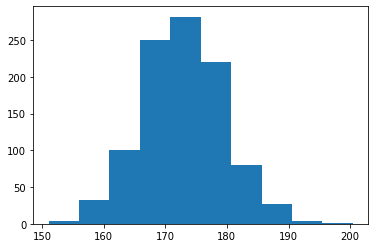

In [2]:
def mcs(symbol):
    days = 7
    trials = 1000

    mean = returns.mean()[symbol]
    var = returns.var()[symbol]
    std = returns.std()[symbol]
    drift = mean - (0.5*var)

    # generate random variables for every predicted day and for every trial
    Z = norm.ppf(np.random.rand(days, trials))
    daily_returns = np.exp(drift + std * Z)

    # price_paths is a list of lists. each list in price_paths corresponds to a day in the simulation
    # and the element at an index i corresponds to the predicted price for trial i
    price_paths = np.zeros_like(daily_returns)
    # the starting price is the last price in the data table (the most recent adj closing price)
    price_paths[0] = data[symbol].iloc[-1]
    for t in range(1, days):
        # the predicted price for day t is the previous day's price * the percent of daily return for day t
        price_paths[t] = price_paths[t-1]*daily_returns[t]
        
    #############################################################################
    # I want a histogram of the last day of predictions 
    # so it is easier to see the most common simulated price
    print('starting price: ' + str(price_paths[0][0]))
    mplt.hist(price_paths[days-1])

# testing it out with Apple stocks
mcs('AAPL')

I felt like it was hard to tell from the histogram whether the trials made money or not, so I plotted the profits instead of the final prices, and made it display the percentage of trials that lost or gained money

lost money 45.9% of the time
gained money 54.1% of the time


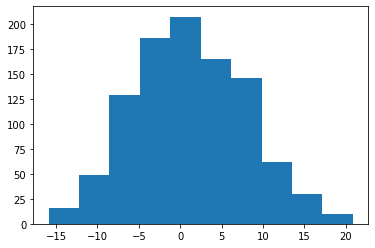

In [3]:
def mcs(symbol):
    days = 7
    trials = 1000

    mean = returns.mean()[symbol]
    var = returns.var()[symbol]
    std = returns.std()[symbol]
    drift = mean - (0.5*var)

    # generate random variables for every predicted day and for every trial
    Z = norm.ppf(np.random.rand(days, trials))
    daily_returns = np.exp(drift + std * Z)

    # price_paths is a list of lists. each list in price_paths corresponds to a day in the simulation
    # and the element at an index i corresponds to the predicted price for trial i
    price_paths = np.zeros_like(daily_returns)
    # the starting price is the last price in the data table (the most recent adj closing price)
    price_paths[0] = data[symbol].iloc[-1]
    for t in range(1, days):
        # the predicted price for day t is the previous day's price * the percent of daily return for day t
        price_paths[t] = price_paths[t-1]*daily_returns[t]

    #############################################################################
    # different code here
    result = price_paths[days-1] - price_paths[0]
    mplt.hist(result)
    lost=0
    gained=0
    for profit in result:
        if profit<=0:
            lost+=1
        else:
            gained+=1
    print('lost money ' + str((lost/trials)*100) + '% of the time')
    print('gained money ' + str((gained/trials)*100) + '% of the time')

# testing it out with Apple stocks
mcs('AAPL')

Finally, since this is the last week of the stock simulation and I have no need to predict stocks for the next week (which is what the method does) I will change it so it will display the predicted profit of each day for the next 3 days (so until dec 10) to help see which day would be good to sell the stocks I have. I will also change it so I can input the starting price that I bought the stock at

In [4]:
def mcs(symbol, starting):
    ######################
    # days is 4 not 3 because it includes day 0
    days = 4
    trials = 1000

    mean = returns.mean()[symbol]
    var = returns.var()[symbol]
    std = returns.std()[symbol]
    drift = mean - (0.5*var)

    # generate random variables for every predicted day and for every trial
    Z = norm.ppf(np.random.rand(days, trials))
    daily_returns = np.exp(drift + std * Z)

    # price_paths is a list of lists. each list in price_paths corresponds to a day in the simulation
    # and the element at an index i corresponds to the predicted price for trial i
    price_paths = np.zeros_like(daily_returns)
    
    
    #############################################################################
    # this time the starting price is the starting priced passed into the argument
    price_paths[0] = [starting for i in range(trials)]
#     print(price_paths[0])
    
    for t in range(1, days):
        # the predicted price for day t is the previous day's price * the percent of daily return for day t
        price_paths[t] = price_paths[t-1]*daily_returns[t]

    #############################################################################
    # different code here
    for t in range(1, days):
#         print(price_paths[t])
        result = price_paths[t] - price_paths[0]
#         print(result)
        mplt.hist(result)
        lost=0
        gained=0
        for profit in result:
            if profit<=0:
                lost+=1
            else:
                gained+=1
        print('Simulation for: ' + symbol)
        print('prediction for after ' + str(t) + ' days')
        print('lost money ' + str((lost/trials)*100) + '% of the time')
        print('gained money ' + str((gained/trials)*100) + '% of the time')
        mplt.show()

The stocks that I currently still have are AMZN, FB, MSFT, ORCL, PYPL. Here is the simulation results for each one

Simulation for: AMZN
prediction for after 1 days
lost money 52.300000000000004% of the time
gained money 47.699999999999996% of the time


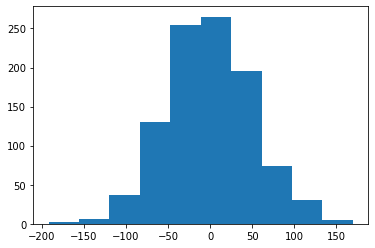

Simulation for: AMZN
prediction for after 2 days
lost money 48.9% of the time
gained money 51.1% of the time


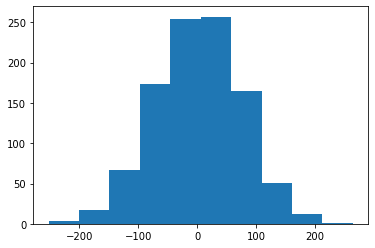

Simulation for: AMZN
prediction for after 3 days
lost money 48.0% of the time
gained money 52.0% of the time


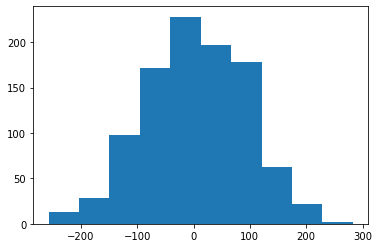

In [5]:
mcs('AMZN', 3380.86)

Simulation for: FB
prediction for after 1 days
lost money 50.8% of the time
gained money 49.2% of the time


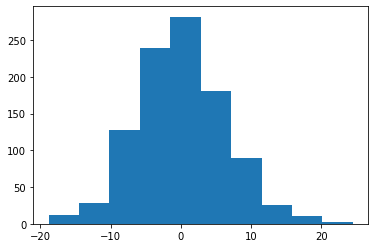

Simulation for: FB
prediction for after 2 days
lost money 51.1% of the time
gained money 48.9% of the time


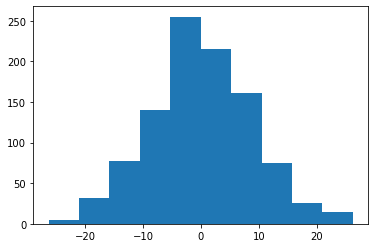

Simulation for: FB
prediction for after 3 days
lost money 49.6% of the time
gained money 50.4% of the time


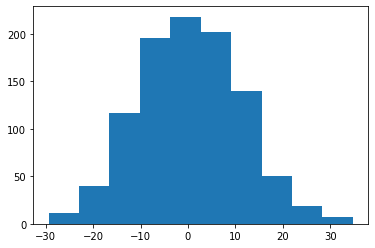

In [6]:
mcs('FB', 333.74)

Simulation for: MSFT
prediction for after 1 days
lost money 45.2% of the time
gained money 54.800000000000004% of the time


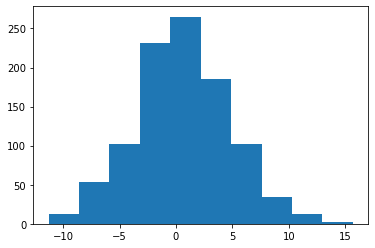

Simulation for: MSFT
prediction for after 2 days
lost money 41.199999999999996% of the time
gained money 58.8% of the time


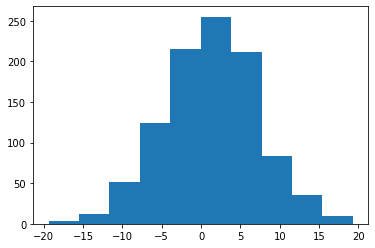

Simulation for: MSFT
prediction for after 3 days
lost money 39.0% of the time
gained money 61.0% of the time


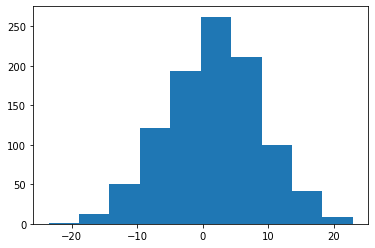

In [7]:
mcs('MSFT', 321.01)

Simulation for: ORCL
prediction for after 1 days
lost money 46.800000000000004% of the time
gained money 53.2% of the time


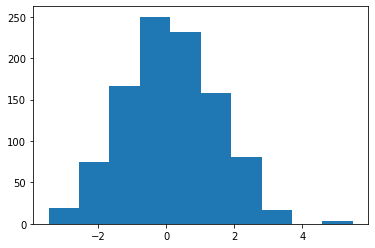

Simulation for: ORCL
prediction for after 2 days
lost money 45.2% of the time
gained money 54.800000000000004% of the time


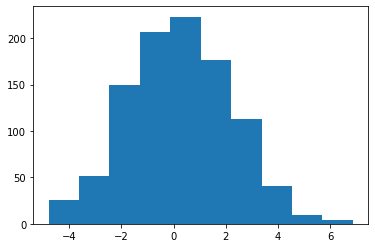

Simulation for: ORCL
prediction for after 3 days
lost money 43.1% of the time
gained money 56.89999999999999% of the time


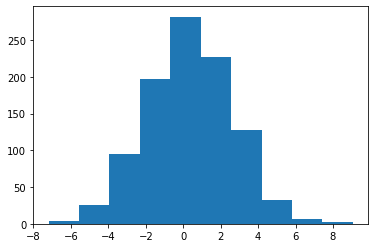

In [8]:
mcs('ORCL', 92.73)

Simulation for: PYPL
prediction for after 1 days
lost money 50.3% of the time
gained money 49.7% of the time


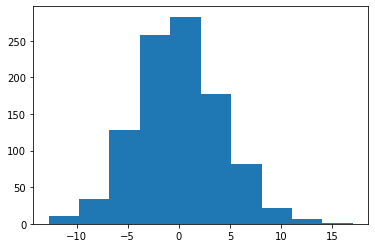

Simulation for: PYPL
prediction for after 2 days
lost money 51.9% of the time
gained money 48.1% of the time


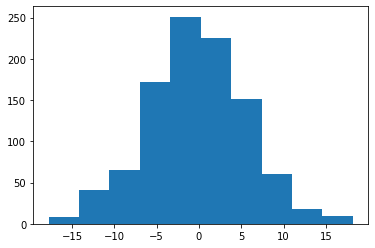

Simulation for: PYPL
prediction for after 3 days
lost money 52.5% of the time
gained money 47.5% of the time


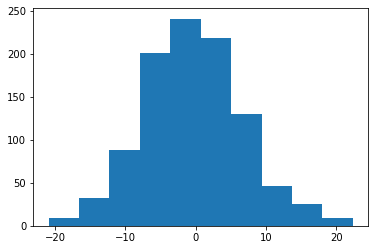

In [9]:
mcs('PYPL', 181.65)

Based on these results, I should sell AMZN three days from now, FB three days from now, MSFT three days from now, ORCL three days from now, and PYPL two days from now